In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn

df=pd.read_csv("/content/drive/MyDrive/CSE499/AllData.csv")
df.head(200)


,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating
...,...,...,...,...,...,...,...,...,...
195,1.560000e+12,-0.415161,0.886719,-0.390259,-4.024390,-3.384146,22.408537,4,Eating
196,1.560000e+12,-0.360596,0.836304,-0.378174,-18.506098,4.451220,3.993902,4,Eating
197,1.560000e+12,-0.408447,0.833862,-0.339233,-17.713415,6.463415,-1.463415,4,Eating
198,1.560000e+12,-0.367920,0.877563,-0.336914,-8.780488,1.615854,8.628049,4,Eating


In [ ]:
# Drop unnecessary columns
df = df.drop(['Person', 'Time'], axis=1)

In [ ]:
# Define variables
epochs = 100
batch_size = 64
num_classes = 5
fig_size = (9, 7)

In [ ]:
# Preprocess function
def preprocess(X, y):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    return X, y

In [ ]:
# Model function
def create_complex_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Compile function
def compile_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Fit function
def fit_model(model, X, y, i):
    history = model.fit(X, y, validation_split=0.2, batch_size=batch_size, epochs=epochs,
                        callbacks=[tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.h5', save_best_only=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1)],
                        verbose=1)
    return history, model

In [ ]:
# Plot function
def plot(history, i):
    epochs_range = range(epochs)
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range, history.history['loss'], label="Training Loss")
    plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()

    plt.figure(figsize=fig_size)
    plt.plot(epochs_range, history.history['accuracy'], label="Training accuracy")
    plt.plot(epochs_range, history.history['val_accuracy'], label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Main code
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Fit function
def fit_model(model, X, y, i, callbacks_list):
    history = model.fit(X, y, validation_split=0.2, batch_size=batch_size, epochs=epochs,
                        callbacks=callbacks_list,
                        verbose=1)
    return history, model

# Updated plot function
def plot(history, model_number):
    epochs_range = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range, history.history['loss'], label="Training Loss")
    plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {model_number} - Loss Over Time")
    plt.show()

    plt.figure(figsize=fig_size)
    plt.plot(epochs_range, history.history['accuracy'], label="Training accuracy")
    plt.plot(epochs_range, history.history['val_accuracy'], label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Model {model_number} - Accuracy Over Time")
    plt.show()

Epoch 1/100
812/812 [==============================] - 4s 3ms/step - loss: 1.3328 - accuracy: 0.4014 - val_loss: 1.0970 - val_accuracy: 0.5584 - lr: 0.0010
Epoch 2/100
812/812 [==============================] - 3s 3ms/step - loss: 1.0968 - accuracy: 0.5483 - val_loss: 0.9916 - val_accuracy: 0.5933 - lr: 0.0010
Epoch 3/100
812/812 [==============================] - 3s 3ms/step - loss: 1.0372 - accuracy: 0.5823 - val_loss: 0.9195 - val_accuracy: 0.6290 - lr: 0.0010
Epoch 4/100
812/812 [==============================] - 3s 4ms/step - loss: 0.9932 - accuracy: 0.6029 - val_loss: 0.8843 - val_accuracy: 0.6435 - lr: 0.0010
Epoch 5/100
812/812 [==============================] - 3s 4ms/step - loss: 0.9608 - accuracy: 0.6191 - val_loss: 0.8451 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 6/100
812/812 [==============================] - 2s 3ms/step - loss: 0.9378 - accuracy: 0.6301 - val_loss: 0.8460 - val_accuracy: 0.6640 - lr: 0.0010
Epoch 7/100
812/812 [==============================] - 3s 3ms/st

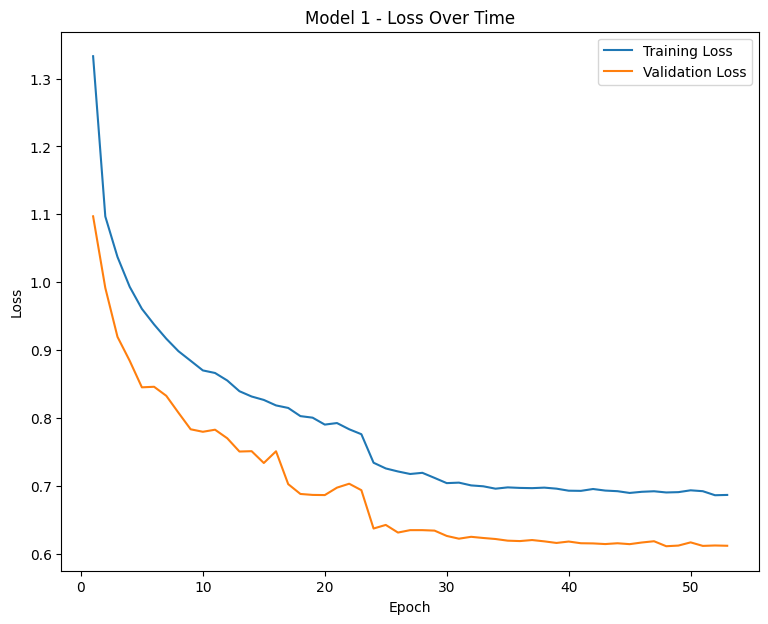

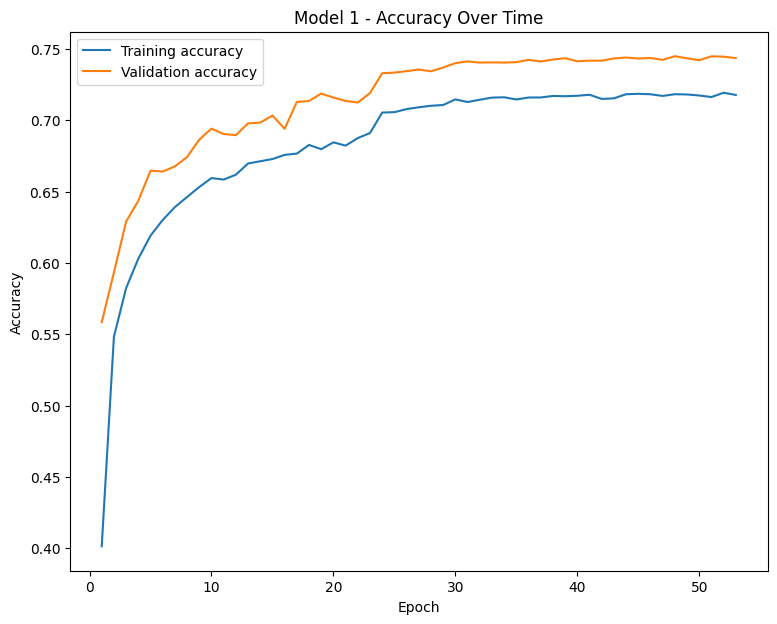

In [ ]:
# Model replica number-1
model_1 = create_complex_model(X_train.shape[1])
model_1 = compile_model(model_1)
checkpoint_1 = ModelCheckpoint('./model_1.h5', save_best_only=True)
early_stopping_1 = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr_1 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
callbacks_list_1 = [checkpoint_1, early_stopping_1, reduce_lr_1]
history_1, model_1 = fit_model(model_1, X_train, y_train, 1, callbacks_list_1)
plot(history_1, 1)

Epoch 1/100
812/812 [==============================] - 4s 4ms/step - loss: 1.3560 - accuracy: 0.3745 - val_loss: 1.0912 - val_accuracy: 0.5669 - lr: 0.0010
Epoch 2/100
812/812 [==============================] - 4s 5ms/step - loss: 1.0996 - accuracy: 0.5478 - val_loss: 0.9545 - val_accuracy: 0.6095 - lr: 0.0010
Epoch 3/100
812/812 [==============================] - 3s 3ms/step - loss: 1.0170 - accuracy: 0.5921 - val_loss: 0.8919 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 4/100
812/812 [==============================] - 3s 3ms/step - loss: 0.9623 - accuracy: 0.6175 - val_loss: 0.8910 - val_accuracy: 0.6292 - lr: 0.0010
Epoch 5/100
812/812 [==============================] - 2s 3ms/step - loss: 0.9266 - accuracy: 0.6354 - val_loss: 0.8138 - val_accuracy: 0.6726 - lr: 0.0010
Epoch 6/100
812/812 [==============================] - 3s 3ms/step - loss: 0.8917 - accuracy: 0.6497 - val_loss: 0.7766 - val_accuracy: 0.6896 - lr: 0.0010
Epoch 7/100
812/812 [==============================] - 4s 5ms/st

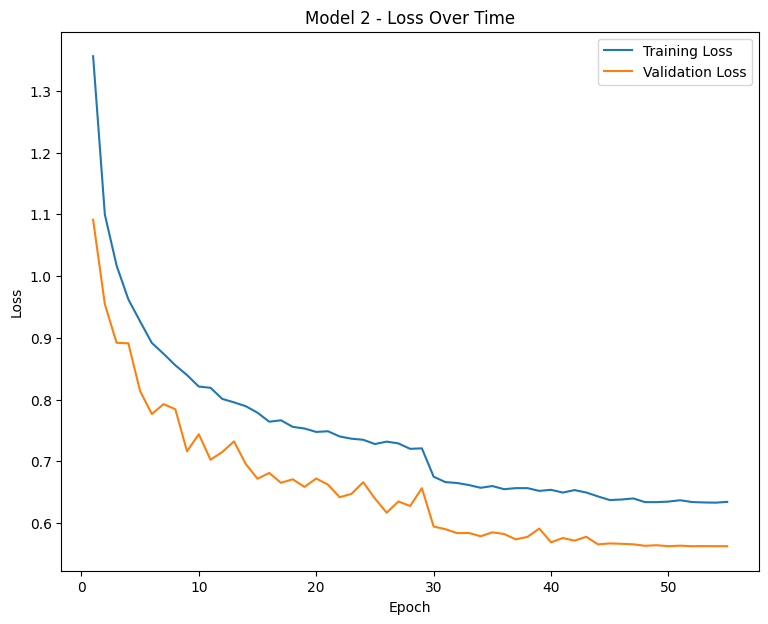

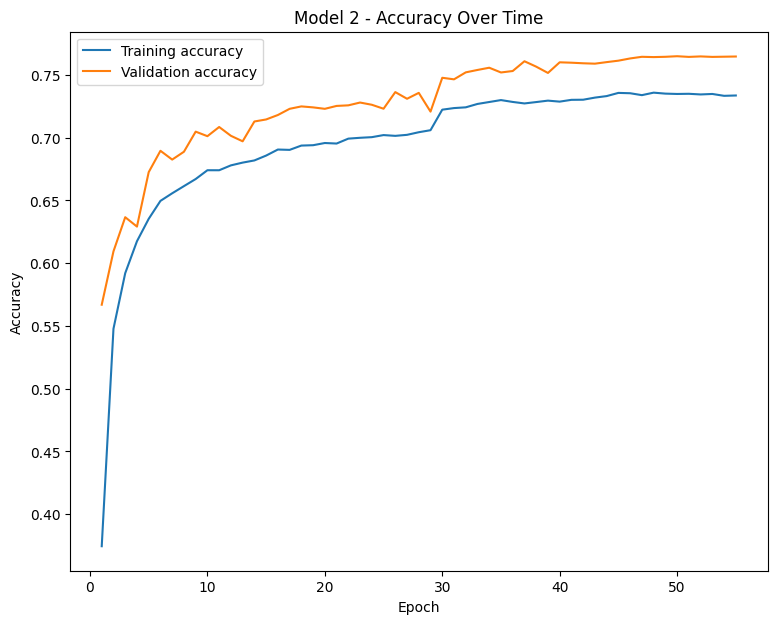

In [ ]:
# Model replica number-2
model_2 = create_complex_model(X_train.shape[1])
model_2 = compile_model(model_2)
checkpoint_2 = ModelCheckpoint('./model_2.h5', save_best_only=True)
early_stopping_2 = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
callbacks_list_2 = [checkpoint_2, early_stopping_2, reduce_lr_2]
history_2, model_2 = fit_model(model_2, X_train, y_train, 2, callbacks_list_2)
plot(history_2, 2)

Epoch 1/100
812/812 [==============================] - 5s 5ms/step - loss: 1.3285 - accuracy: 0.3976 - val_loss: 1.0492 - val_accuracy: 0.5251 - lr: 0.0010
Epoch 2/100
812/812 [==============================] - 3s 4ms/step - loss: 1.1070 - accuracy: 0.5294 - val_loss: 0.9875 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 3/100
812/812 [==============================] - 3s 3ms/step - loss: 1.0574 - accuracy: 0.5605 - val_loss: 0.9838 - val_accuracy: 0.5906 - lr: 0.0010
Epoch 4/100
812/812 [==============================] - 4s 4ms/step - loss: 1.0243 - accuracy: 0.5767 - val_loss: 0.9365 - val_accuracy: 0.6156 - lr: 0.0010
Epoch 5/100
812/812 [==============================] - 3s 4ms/step - loss: 1.0047 - accuracy: 0.5862 - val_loss: 0.9129 - val_accuracy: 0.6208 - lr: 0.0010
Epoch 6/100
812/812 [==============================] - 3s 3ms/step - loss: 0.9855 - accuracy: 0.5978 - val_loss: 0.8990 - val_accuracy: 0.6281 - lr: 0.0010
Epoch 7/100
812/812 [==============================] - 3s 3ms/st

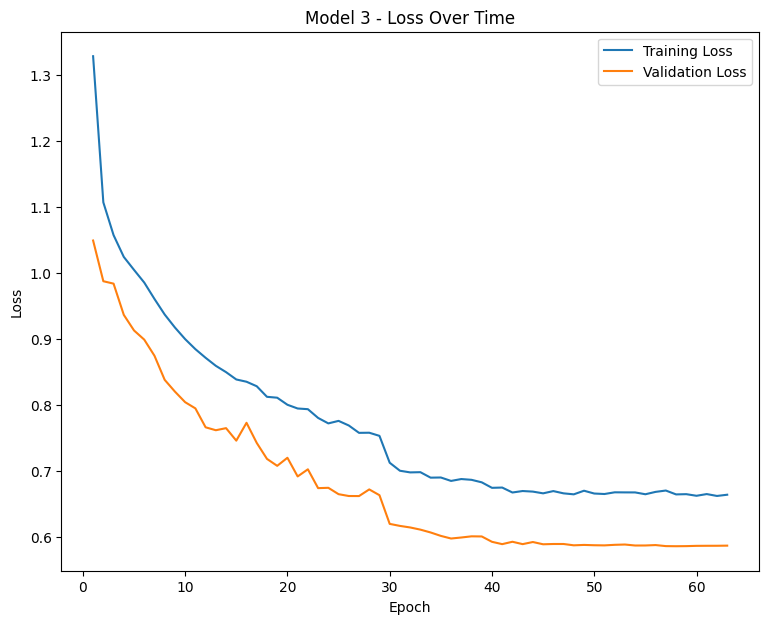

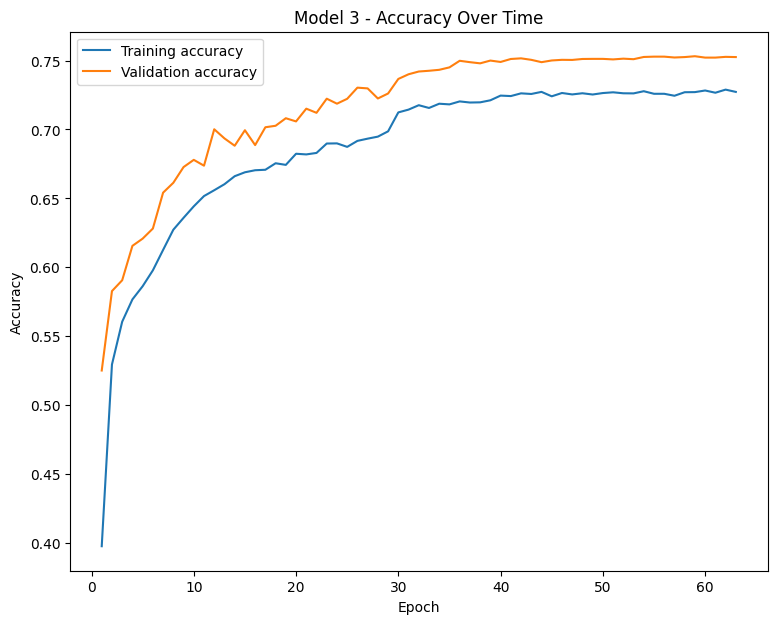

In [ ]:
# Model replica number-3
model_3 = create_complex_model(X_train.shape[1])
model_3 = compile_model(model_3)
checkpoint_3 = ModelCheckpoint('./model_3.h5', save_best_only=True)
early_stopping_3 = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr_3 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
callbacks_list_3 = [checkpoint_3, early_stopping_3, reduce_lr_3]
history_3, model_3 = fit_model(model_3, X_train, y_train, 3, callbacks_list_3)
plot(history_3, 3)

**Global Model**

In [ ]:
global_model = create_complex_model(X_train.shape[1])  # Define global_model

In [ ]:
all_models = [model_1, model_2, model_3]

In [ ]:
def apply_weight_function(weights):
    # ... code omitted ...
    return avg_model_weights


In [ ]:
weights = [max(history_1.history['accuracy']), max(history_2.history['accuracy']), max(history_3.history['accuracy'])]
x = max(weights)
idx = weights.index(x)
weights[idx] = 1
x = min(weights)
idx = weights.index(x)
weights[idx] = 0.02
for i in range(3):
    if (weights[i] != 1 and weights[i] != 0.02):
        weights[i] = 0.03
        break

In [ ]:
# Calculate average weights
all_model_weights = [model_1.get_weights(), model_2.get_weights(), model_3.get_weights()]
avg_model_weights = []

for weights_list_tuple in zip(*all_model_weights):
    layer_average = np.array([np.array(layer_weights).mean(axis=0) for layer_weights in zip(*weights_list_tuple)])
    avg_model_weights.append(layer_average)

avg_model_weights = np.array(avg_model_weights)


In [ ]:
checkpoint_global = ModelCheckpoint('./global_model.h5', save_best_only=True)
early_stopping_global = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr_global = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
callbacks_list_global = [checkpoint_global, early_stopping_global, reduce_lr_global]

global_model.set_weights(avg_model_weights)
global_model = compile_model(global_model)

In [ ]:
history_global, _ = fit_model(global_model, X_test, y_test, 'global', callbacks_list_global)

Epoch 1/100
91/91 [==============================] - 2s 8ms/step - loss: 1.5006 - accuracy: 0.3421 - val_loss: 1.3247 - val_accuracy: 0.5402 - lr: 0.0010
Epoch 2/100
91/91 [==============================] - 0s 5ms/step - loss: 1.3113 - accuracy: 0.4754 - val_loss: 1.1206 - val_accuracy: 0.5562 - lr: 0.0010
Epoch 3/100
91/91 [==============================] - 1s 6ms/step - loss: 1.1922 - accuracy: 0.5071 - val_loss: 1.0196 - val_accuracy: 0.6026 - lr: 0.0010
Epoch 4/100
91/91 [==============================] - 1s 6ms/step - loss: 1.1166 - accuracy: 0.5380 - val_loss: 0.9417 - val_accuracy: 0.6158 - lr: 0.0010
Epoch 5/100
91/91 [==============================] - 1s 6ms/step - loss: 1.0577 - accuracy: 0.5721 - val_loss: 0.9106 - val_accuracy: 0.6415 - lr: 0.0010
Epoch 6/100
91/91 [==============================] - 1s 6ms/step - loss: 1.0221 - accuracy: 0.5933 - val_loss: 0.8736 - val_accuracy: 0.6477 - lr: 0.0010
Epoch 7/100
91/91 [==============================] - 0s 5ms/step - loss: 1.0

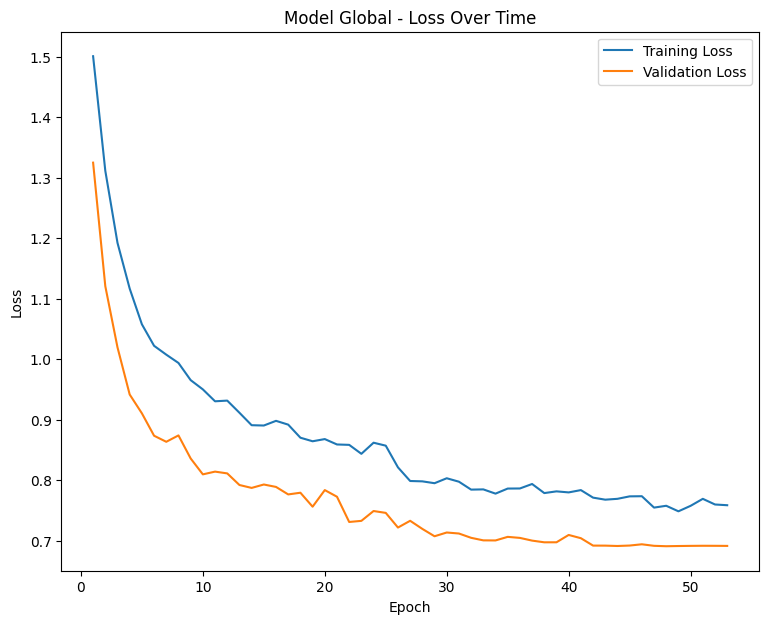

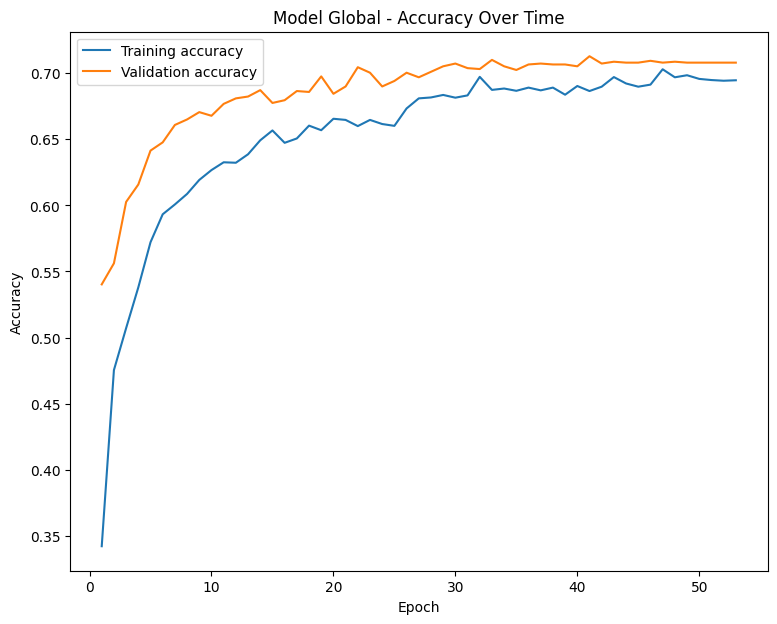

In [ ]:
plot(history_global, 'Global')

In [ ]:
result = global_model.evaluate(X_test, y_test, verbose=1)
accuracy = result[1]  # Extract the accuracy value from the list
print(f"Global Model Accuracy: {round(accuracy * 100, 2)}%")

226/226 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.7209
Global Model Accuracy: 72.09%


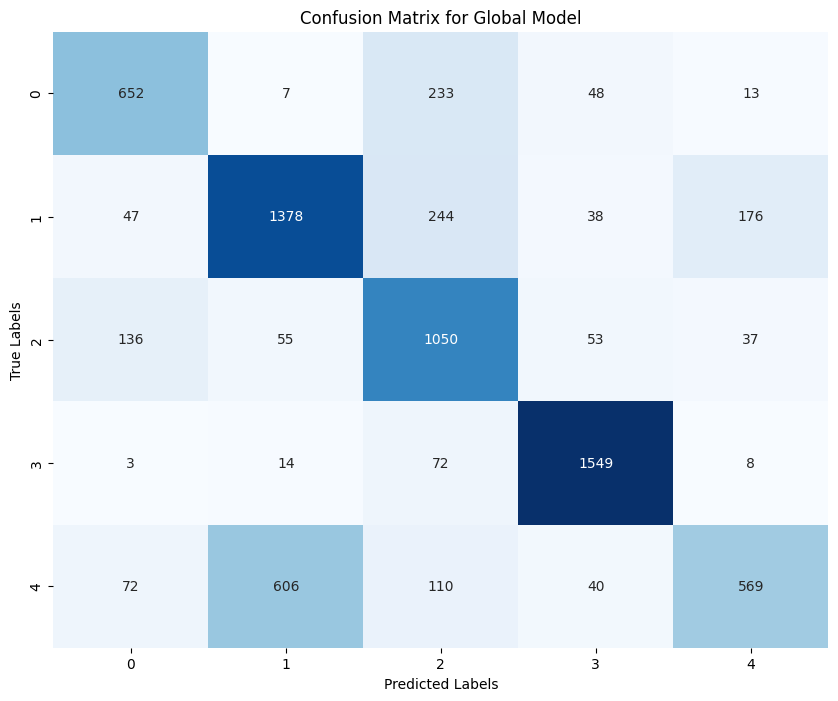

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the confusion matrix array 'conf_matrix_global'
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_global, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Global Model')
plt.show()
